In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

Преобразование данных, чтобы дальше было удобнее выполнять операции

In [4]:
df['year'] = df['Day'].apply(lambda d: d.year)
df['month'] = df['Day'].apply(lambda d: d.month)
df['day'] = df['Day'].apply(lambda d: d.day)

In [5]:
df.head(10)

,Day,t,year,month,day
0,2008-01-01,0,2008,1,1
1,2008-01-02,-5,2008,1,2
2,2008-01-03,-11,2008,1,3
3,2008-01-04,-11,2008,1,4
4,2008-01-05,-12,2008,1,5
5,2008-01-06,-14,2008,1,6
6,2008-01-07,-6,2008,1,7
7,2008-01-08,-7,2008,1,8
8,2008-01-09,-6,2008,1,9
9,2008-01-10,0,2008,1,10


**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [6]:
coldest_year = df.groupby('year').mean()['t'].idxmin()
warmest_year = df.groupby('year').mean()['t'].idxmax()

print(f'Самый холодный год: {coldest_year}\nСамый теплый год: {warmest_year}')

Самый холодный год: 2012
Самый теплый год: 2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [7]:
df[(df['month'] == 1) & (df['t'] >= 0)].groupby('year').count()['day'].idxmax()

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [8]:
df[df['month'].between(6,8)].groupby('year').mean()['t'].idxmin()

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [9]:
df['t_diff'] = abs(df['t'].diff())
print(df['Day'].iloc[df['t_diff'].idxmax()].date())

2014-05-27


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot: xlabel='year'>

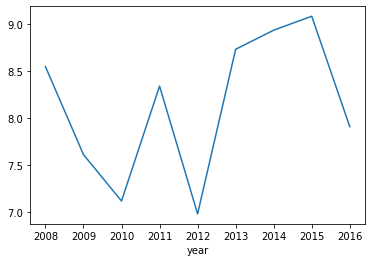

In [10]:
df.groupby('year').mean()['t'].plot()